<a href="https://colab.research.google.com/github/zia123123/404/blob/main/tugas_1_1301218608.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from cvxopt import matrix, solvers

In [3]:
COLORS = ['red', 'blue']

x_train = np.array([[0.20, 0.20], [-0.10, 0.50], [0.30, 0.20],
                   [0.10, 0.50], [0.30, 0.10], [0.00, 0.30],
                   [0.40, 0.50], [-0.30, -0.30], [0.10, -0.40],
                   [-0.10, -0.30], [0.00, -0.50], [-0.30, -0.10],
                   [-0.50, -0.40], [-0.40, -0.20]])

y_train = np.array([1., 1., 1., 1., 1., 1., 1., -1., -1., -1., -1., -1., -1., -1.])

x_test = np.array([[-0.40, 0.40], [-0.50, 0.50], [-0.40, 0.50], [-0.30, 0.40],
                  [0.50, 0.00], [0.40, 0.10], [0.50, 0.40], [0.10, 0.30],
                  [0.20, 0.30], [-0.30, 0.50], [0.30, 0.40], [0.10, 0.20],
                  [0.50, 0.20], [-0.10, 0.30], [0.00, 0.50], [0.50, -0.50],
                  [0.50, -0.40], [-0.50, 0.10], [-0.10, -0.20], [0.00, -0.30],
                  [0.30, -0.30], [-0.40, -0.10], [0.30, -0.40], [0.10, -0.30],
                  [0.10, -0.50], [-0.20, -0.20], [-0.30, -0.20], [-0.50, -0.10],
                  [-0.40, -0.40], [-0.50, -0.50], [-0.20, -0.50], [-0.20, -0.40]])

y_test = [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., -1., -1., -1., 
                  -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1]

n_train, D = x_train.shape
n_test, _ = x_test.shape

In [6]:
def scatter_plot(ax, x, y):
  unique = np.unique(y)
  for li in range(len(unique)):
    x_s = x[y==unique[li]]
    ax.set_xticks(np.arange(-1, 1, 0.1))
    ax.set_yticks(np.arange(-1, 1., 0.1))
    ax.scatter(x_s[:, 0], x_s[:, 1], c=COLORS[li])
    ax.grid(b=True, which='both', color='k', linestyle='', linewidth=.1)

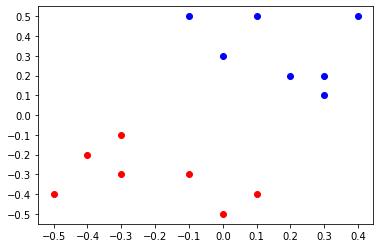

In [7]:
fig, ax = plt.subplots()
scatter_plot(ax, x_train, y_train)
plt.show()

In [5]:
K = y_train[:, None]*x_train
KKt = K.dot(K.T)
P = matrix(KKt)
q = matrix(-np.ones((n_train, 1)))
G = matrix(-np.eye(n_train))
h = matrix(np.zeros(n_train))
A = matrix(y_train.reshape(1, -1))
b = matrix(np.zeros(1))

solvers.options['show_progress'] = True
qp_solver = solvers.qp(P, q, G, h, A, b)

alpha = np.array(qp_solver['x'])


     pcost       dcost       gap    pres   dres
 0: -3.9566e+00 -9.9644e+00  2e+01  4e+00  2e+00
 1: -5.3822e+00 -8.3614e+00  4e+00  4e-01  2e-01
 2: -7.3460e+00 -8.2900e+00  1e+00  7e-02  3e-02
 3: -7.9669e+00 -8.0139e+00  5e-02  5e-04  2e-04
 4: -7.9986e+00 -8.0008e+00  2e-03  6e-06  2e-06
 5: -7.9999e+00 -8.0001e+00  2e-04  2e-09  8e-10
 6: -8.0000e+00 -8.0000e+00  3e-05  2e-15  3e-16
 7: -8.0000e+00 -8.0000e+00  4e-06  3e-15  3e-16
Optimal solution found.


In [ ]:
print('alpha = ', np.round(alpha.T, 2))

alpha =  [[0. 0. 0. 0. 0. 8. 0. 0. 0. 0. 0. 8. 0. 0.]]


In [ ]:
w = np.sum(alpha*y_train[:, None] * x_train, axis=0)
print('w = ', w)

w =  [2.39852179 3.20110867]


In [ ]:
th = (alpha > 1e-4).reshape(-1)
print(th)

b = y_train[th]-x_train[th].dot(w)
bias = b[0]
print('bias = ', bias)

[False False False False False  True False False  True False False  True
 False False]
bias =  0.03966739921779361


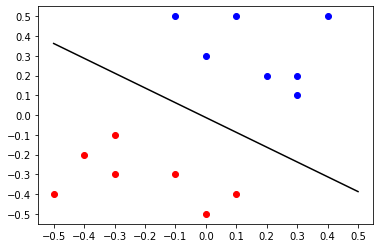

In [ ]:
norm = np.linalg.norm(w)
w, bias = w/norm, bias/norm
fig, ax = plt.subplots()

m = -w[0]/w[1]
intercept = -bias/w[1]
x2 = np.arange(-.5, 1)
ax.plot(x2, x2*m + intercept, 'k-')
scatter_plot(ax, x_train, y_train)

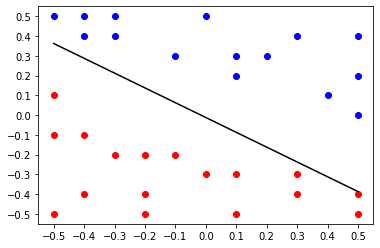

In [ ]:
orm = np.linalg.norm(w)
w, bias = w/norm, bias/norm
fig, ax = plt.subplots()

m = -w[0]/w[1]
intercept = -bias/w[1]
x2 = np.arange(-.5, 1)
ax.plot(x2, x2*m + intercept, 'k-')
scatter_plot(ax, x_test, y_test)


In [ ]:
y_pred_train = (w.dot(x_train.T)+bias>0)*2-1
y_pred_test = (w.dot(x_test.T)+bias>0)*2-1


print('prediksi data train = ', y_pred_train)
print('prediksi data test = ', y_pred_test)

acc_train = np.sum(y_pred_train == y_train)/n_train*100
print('akurasi training = ', acc_train, '%')

acc_test = np.sum(y_pred_test == y_test)/n_test*100
print('akurasi training = ', acc_test, '%')

prediksi data train =  [ 1  1  1  1  1  1  1 -1 -1 -1 -1 -1 -1 -1]
prediksi data test =  [ 1  1  1  1  1  1  1  1  1  1  1  1  1  1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1]
akurasi training =  100.0 %
akurasi training =  100.0 %
